# 220968280 - Anirudh Swaminathan - DSE A2

## Week 9 - Exercise 1 - ensemble techniques-voting, average, weighted-average

In [1]:
from sklearn import datasets
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np

### 1. ensemble techniques on iris dataset

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
lr = LogisticRegression()
svc = SVC(kernel='rbf', probability=True)
dt = DecisionTreeClassifier()
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
print(f'decision tree classifier accuracy: {accuracy_score(y_test, dt.predict(X_test))}')
print(f'support vector classifier accuracy: {accuracy_score(y_test, svc.predict(X_test))}')
print(f'logistic regression accuracy: {accuracy_score(y_test, lr.predict(X_test))}')

decision tree classifier accuracy: 1.0
support vector classifier accuracy: 1.0
logistic regression accuracy: 1.0


Voting Ensemble score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

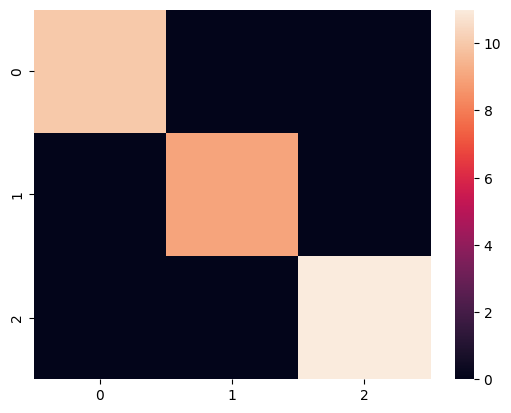

In [6]:
voting = VotingClassifier(estimators=[('dt', dt), ('svc', svc), ('lr', lr)], voting='soft')
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)
print(f"Voting Ensemble score: {accuracy_score(y_test, y_pred_voting)}")
print(classification_report(y_test, y_pred_voting))
sns.heatmap(confusion_matrix(y_test, y_pred_voting))

In [7]:
lr_pred = lr.predict_proba(X_test)
svc_pred = svc.predict_proba(X_test)
dt_pred = dt.predict_proba(X_test)

Average Ensemble Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

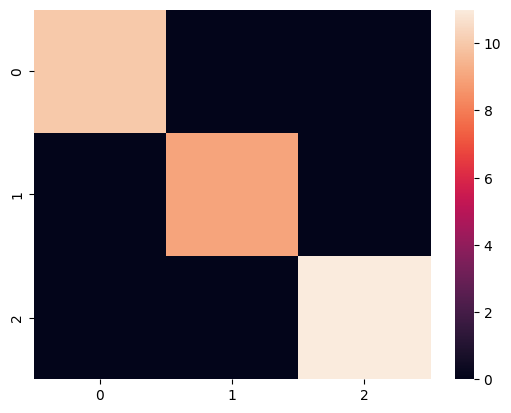

In [8]:
avg_pred = (lr_pred + svc_pred + dt_pred) / 3
avg_ensemble_pred = np.argmax(avg_pred, axis=1)
avg_ensemble_score = accuracy_score(y_test, avg_ensemble_pred)
print(f'Average Ensemble Score: {avg_ensemble_score}')
print(classification_report(y_test, avg_ensemble_pred))
sns.heatmap(confusion_matrix(y_test, avg_ensemble_pred))

Weighted average Ensemble Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

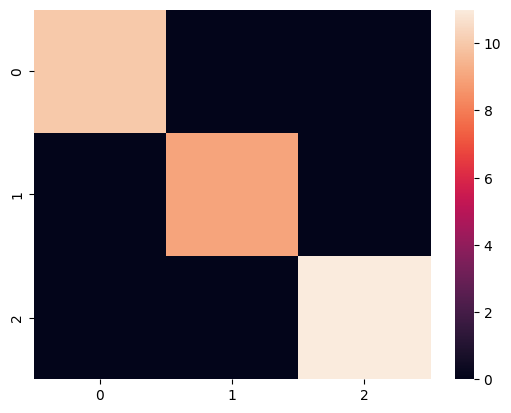

In [9]:
weights = [0.3, 0.5, 0.2] 
weighted_avg_pred = (weights[0]*lr_pred + weights[1]*svc_pred + weights[2]*dt_pred)
weighted_avg_ensemble_pred = np.argmax(weighted_avg_pred, axis=1)
weighted_avg_ensemble_score = accuracy_score(y_test, weighted_avg_ensemble_pred)
print(f'Weighted average Ensemble Score: {weighted_avg_ensemble_score}')
print(classification_report(y_test, weighted_avg_ensemble_pred))
sns.heatmap(confusion_matrix(y_test, weighted_avg_ensemble_pred))

### 2. ensembles techniques on breast_cancer dataset

In [10]:
cancer = datasets.load_breast_cancer()
X2 = cancer.data
y2 = cancer.target

In [11]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [12]:
lr2 = LogisticRegression()
svc2 = SVC(kernel='rbf', probability=True)
dt2 = DecisionTreeClassifier()
lr2.fit(X_train2, y_train2)
svc2.fit(X_train2, y_train2)
dt2.fit(X_train2, y_train2)

c:\Users\s_ani\Documents\textbooks\4thSem\ML_LAB\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [13]:
print(f'decision tree classifier accuracy: {accuracy_score(y_test2, dt2.predict(X_test2))}')
print(f'support vector classifier accuracy: {accuracy_score(y_test2, svc2.predict(X_test2))}')
print(f'logistic regression accuracy: {accuracy_score(y_test2, lr2.predict(X_test2))}')

decision tree classifier accuracy: 0.9473684210526315
support vector classifier accuracy: 0.9473684210526315
logistic regression accuracy: 0.956140350877193


Voting Ensemble score: 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



c:\Users\s_ani\Documents\textbooks\4thSem\ML_LAB\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

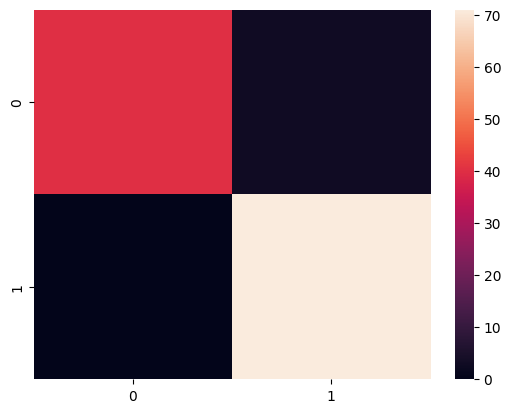

In [14]:
voting2 = VotingClassifier(estimators=[('dt2', dt2), ('svc2', svc2), ('lr2', lr2)], voting='soft')
voting.fit(X_train2, y_train2)
y_pred_voting2 = voting.predict(X_test2)
print(f"Voting Ensemble score: {accuracy_score(y_test2, y_pred_voting2)}")
print(classification_report(y_test2, y_pred_voting2))
sns.heatmap(confusion_matrix(y_test2, y_pred_voting2))

In [15]:
lr_pred2 = lr2.predict_proba(X_test2)
svc_pred2 = svc2.predict_proba(X_test2)
dt_pred2 = dt2.predict_proba(X_test2)

Average Ensemble Score: 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<Axes: >

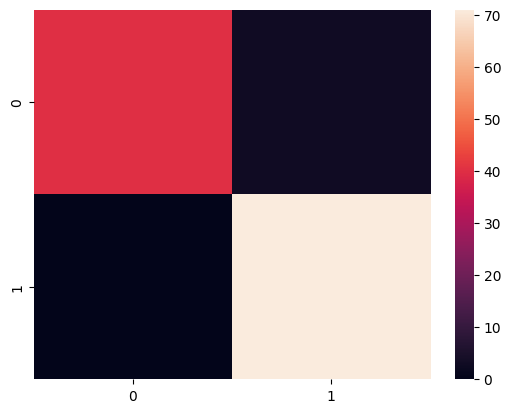

In [16]:
avg_pred2 = (lr_pred2 + svc_pred2 + dt_pred2) / 3
avg_ensemble_pred2 = np.argmax(avg_pred2, axis=1)
avg_ensemble_score2 = accuracy_score(y_test2, avg_ensemble_pred2)
print(f'Average Ensemble Score: {avg_ensemble_score2}')
print(classification_report(y_test2, avg_ensemble_pred2))
sns.heatmap(confusion_matrix(y_test2, avg_ensemble_pred2))

Weighted average Ensemble Score: 0.9649122807017544
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



<Axes: >

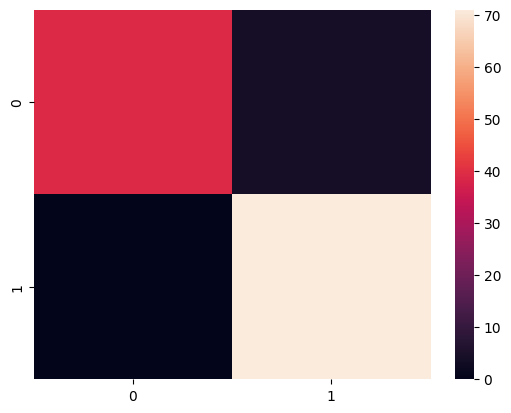

In [17]:
weights = [0.3, 0.5, 0.2] 
weighted_avg_pred2 = (weights[0]*lr_pred2 + weights[1]*svc_pred2 + weights[2]*dt_pred2)
weighted_avg_ensemble_pred2 = np.argmax(weighted_avg_pred2, axis=1)
weighted_avg_ensemble_score2 = accuracy_score(y_test2, weighted_avg_ensemble_pred2)
print(f'Weighted average Ensemble Score: {weighted_avg_ensemble_score2}')
print(classification_report(y_test2, weighted_avg_ensemble_pred2))
sns.heatmap(confusion_matrix(y_test2, weighted_avg_ensemble_pred2))